In [ ]:
import pandas as pd
import numpy as np
path = 'twvsuc.xlsx'
df = pd.read_excel(path)

In [ ]:
df.head()

,Selected characteristic,1869-70,Unnamed: 2,1879-80,1889-90,1899-1900,1909-10,1919-20,1929-30,1939-40,...,2009-10,Unnamed: 22,2013-14,Unnamed: 24,2014-15,Unnamed: 26,2015-16,Unnamed: 28,2016-17,Unnamed: 30
0,1,2,NaN,3,4,5,6,7,8,9.000000,...,16,NaN,17,NaN,18,NaN,19,NaN,20,NaN
1,"Population, pupils, and instructional staff",NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total population (in thousands)\1\,38558,NaN,50156,62622,75995,90490,104514,121878,131028.000000,...,306772,NaN,316058,NaN,318386,NaN,320743,NaN,323071,NaN
3,5- to 17-year-olds (in thousands)\1\,11683,NaN,15066,18473,21573,24011,27571,31414,30151.000000,...,53889.6,NaN,53720.7,NaN,53692.7,NaN,53701.6,NaN,53727.3,NaN
4,5- to 17-year-olds as a percent of total\n ...,30.2998,NaN,30,29.4992,28.4,26.5344,26.3802,25.775,23.011112,...,17.5667,NaN,16.9971,NaN,16.864,NaN,16.7429,NaN,16.6302,NaN


In [ ]:
df.info

<bound method DataFrame.info of                               Selected characteristic  1869-70 Unnamed: 2  \
0                                                   1        2        NaN   
1         Population, pupils, and instructional staff      NaN        NaN   
2                 Total population (in thousands)\1\     38558        NaN   
3               5- to 17-year-olds (in thousands)\1\     11683        NaN   
4     5- to 17-year-olds as a percent of total\n  ...  30.2998        NaN   
..                                                ...      ...        ...   
89                                                NaN      NaN        NaN   
90                                                NaN      NaN        NaN   
91                                                NaN      NaN        NaN   
92                                                NaN      NaN        NaN   
93                                                NaN      NaN        NaN   

   1879-80  1889-90 1899-1900  1909-10  191

In [ ]:
import re

In [ ]:
df.replace('\-\-\-', '', regex=True, inplace=True)
df.replace('\\\\.*\\\\', '', regex=True, inplace=True)
df.replace(r'^\s+$', 'NaN', regex=True, inplace=True)
df.replace('', 'NaN', inplace=True)

In [ ]:
df.dropna(axis=1, how='all', inplace=True)

In [ ]:
df.dropna(axis=0, how='all', inplace=True)

In [ ]:
badcols = [x for x in df.columns if x[:9]=='Unnamed: ']
df.drop(badcols, axis=1, inplace=True)

In [ ]:
df.drop(0, axis=0, inplace = True)

In [ ]:
df.head()

,Selected characteristic,1869-70,1879-80,1889-90,1899-1900,1909-10,1919-20,1929-30,1939-40,1949-50,1959-60,1969-70,1979-80,1989-90,1999-2000,2009-10,2013-14,2014-15,2015-16,2016-17
1,"Population, pupils, and instructional staff",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total population (in thousands),38558,50156,62622,75995,90490,104514,121878,131028.000000,149188,177830,201385,225055,246819,279040,306772,316058,318386,320743,323071
3,5- to 17-year-olds (in thousands),11683,15066,18473,21573,24011,27571,31414,30151.000000,30223,43881,52386,48042.6,44947,52810.8,53889.6,53720.7,53692.7,53701.6,53727.3
4,5- to 17-year-olds as a percent of total\n ...,30.2998,30,29.4992,28.4,26.5344,26.3802,25.775,23.011112,20.2583,24.6758,26.0129,21.347,18.2105,18.9259,17.5667,16.9971,16.864,16.7429,16.6302
5,Total enrollment in elementary and secondary\n...,7562,9867,12723,15503,17814,21578,25678,25434.000000,25112,36087,45550,41651,40542.7,46857.1,49361,50044.5,50312.6,50438,50615.2


In [ ]:
dfnames = [str(x)+'_' for x in df['Selected characteristic']]

In [ ]:
def name(dfnames, index, start=0):
    l = list(dfnames)
    idx2name = [re.sub('[ ]*\\n[ ]*', ' ', (str(l[i]).strip().rstrip('0987654321').rstrip('_')))+('_'+str(i+start) if index else '') if str(l[i])!='nan_' else 'nan' for i in range(len(l))]
    name2idx = {idx2name[i]:i for i in range(len(idx2name))}
    return (idx2name, name2idx)

idx2name, name2idx = name(dfnames, True)

In [ ]:
idx2name

['Population, pupils, and instructional staff_0',
 'Total population (in thousands) _1',
 '5- to 17-year-olds (in thousands) _2',
 '5- to 17-year-olds as a percent of total population _3',
 'Total enrollment in elementary and secondary schools (in thousands) _4',
 'Prekindergarten through grade 8 (in thousands) _5',
 'Grades 9-12 (in thousands) _6',
 'Enrollment as a percent of total population _7',
 'Enrollment as a percent of 5- to 17-year-olds _8',
 'Percent of total enrollment in grades 9-12 _9',
 'High school graduates (in thousands) _10',
 'Average daily attendance (in thousands) _11',
 'Total number of days attended by pupils enrolled (in millions) _12',
 'Percent of enrolled pupils attending daily _13',
 'Average length of school term, in days _14',
 'Average number of days attended per pupil _15',
 'Total full-time-equivalent (FTE) instructional staff (in thousands) _16',
 'Supervisors (in thousands) _17',
 'Principals (in thousands) _18',
 'Teachers, teacher aides, librarians

In [ ]:
df.rename({i+1:idx2name[i] for i in range(len(idx2name))}, axis=0, inplace=True)

In [ ]:
df.drop('nan', axis=0, inplace=True)
df.drop(df.index.values[0], axis=0, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
dff = df.astype(float)

In [ ]:
dff.dropna(axis=0, how='all', inplace=True)

In [ ]:
idx2name, name2idx = name(dff.index.values, True)

In [ ]:
(len(idx2name), len(set(idx2name)))

(65, 65)

In [ ]:
dft = dff.transpose()
dft.head()

,Total population (in thousands) _1,5- to 17-year-olds (in thousands) _2,5- to 17-year-olds as a percent of total population _3,Total enrollment in elementary and secondary schools (in thousands) _4,Prekindergarten through grade 8 (in thousands) _5,Grades 9-12 (in thousands) _6,Enrollment as a percent of total population _7,Enrollment as a percent of 5- to 17-year-olds _8,Percent of total enrollment in grades 9-12 _9,High school graduates (in thousands) _10,...,Other current expenditures _63,Annual salary of classroom teachers _65,Personal income per member of labor force _66,Total school expenditures per capita of total population _67,National income per capita _68,Current expenditure per pupil in ADA _69,Total expenditure per pupil in ADA _70,National income per pupil in ADA _71,Current expenditure per day per pupil in ADA _72,Total expenditure per day per pupil in ADA _73
1869-70,38558.0,11683.0,30.299808,7562.0,7481.0,80.0,19.612013,64.726526,1.057921,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1879-80,50156.0,15066.0,30.000000,9867.0,9757.0,110.0,19.700000,65.500000,1.100000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889-90,62622.0,18473.0,29.499218,12723.0,12520.0,203.0,20.317141,68.873491,1.595536,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1899-1900,75995.0,21573.0,28.400000,15503.0,14984.0,519.0,20.400000,71.900000,3.300000,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909-10,90490.0,24011.0,26.534424,17814.0,16899.0,915.0,19.686153,74.190996,5.136410,111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dft_c = dft.drop(list(df.dropna(axis = 0).index.values[-18:]), axis=1)
dft_c = dft.drop(list(dft.columns[-19:]), axis=1)

In [ ]:
idx2name, name2idx = name(dft_c.columns, True)

In [ ]:
dft_c.rename(columns={dft_c.columns[i]: idx2name[i] for i in range(len(dft_c.columns))}, inplace=True)

In [ ]:
dft_c.head()

,Total population (in thousands) _0,5- to 17-year-olds (in thousands) _1,5- to 17-year-olds as a percent of total population _2,Total enrollment in elementary and secondary schools (in thousands) _3,Prekindergarten through grade 8 (in thousands) _4,Grades 9-12 (in thousands) _5,Enrollment as a percent of total population _6,Enrollment as a percent of 5- to 17-year-olds _7,Percent of total enrollment in grades 9-12 _8,High school graduates (in thousands) _9,...,Interest on school debt _36,Other current expenditures _37,Annual salary of classroom teachers _38,Personal income per member of labor force _39,Total school expenditures per capita of total population _40,National income per capita _41,Current expenditure per pupil in ADA _42,Total expenditure per pupil in ADA _43,National income per pupil in ADA _44,Current expenditure per day per pupil in ADA _45
1869-70,38558.0,11683.0,30.299808,7562.0,7481.0,80.0,19.612013,64.726526,1.057921,NaN,...,NaN,NaN,189.0,NaN,1.59,NaN,NaN,15.55,NaN,NaN
1879-80,50156.0,15066.0,30.000000,9867.0,9757.0,110.0,19.700000,65.500000,1.100000,NaN,...,NaN,NaN,195.0,NaN,1.56,NaN,NaN,12.71,NaN,NaN
1889-90,62622.0,18473.0,29.499218,12723.0,12520.0,203.0,20.317141,68.873491,1.595536,22.0,...,NaN,NaN,252.0,NaN,2.23,NaN,13.99,17.23,NaN,0.10
1899-1900,75995.0,21573.0,28.400000,15503.0,14984.0,519.0,20.400000,71.900000,3.300000,62.0,...,NaN,NaN,325.0,NaN,2.83,NaN,16.67,20.21,NaN,0.12
1909-10,90490.0,24011.0,26.534424,17814.0,16899.0,915.0,19.686153,74.190996,5.136410,111.0,...,NaN,NaN,485.0,NaN,4.71,NaN,27.85,33.23,NaN,0.18


In [ ]:
dft_na = dft_c.copy()
dft_c.fillna(dft_c.mean(), inplace=True)

In [ ]:
def corr(dft_c, cols):
    df = dft_c[cols]
    return df.corr()

In [ ]:
l = [
    'Total enrollment in elementary and secondary schools (in thousands) _3',
    'Enrollment as a percent of 5- to 17-year-olds _7',
    'High school graduates (in thousands) _9',
    'Average daily attendance (in thousands) _10',
    'Teachers, teacher aides, librarians, and guidance counselors (in thousands) _18',
    'Percent male _21',
    'Total expenditures for public schools (in millions) _29',
    'Annual salary of classroom teachers _38',
    'Total expenditure per pupil in ADA _43',
    'National income per pupil in ADA _44'
]

corrMat = corr(dft_c, l)

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

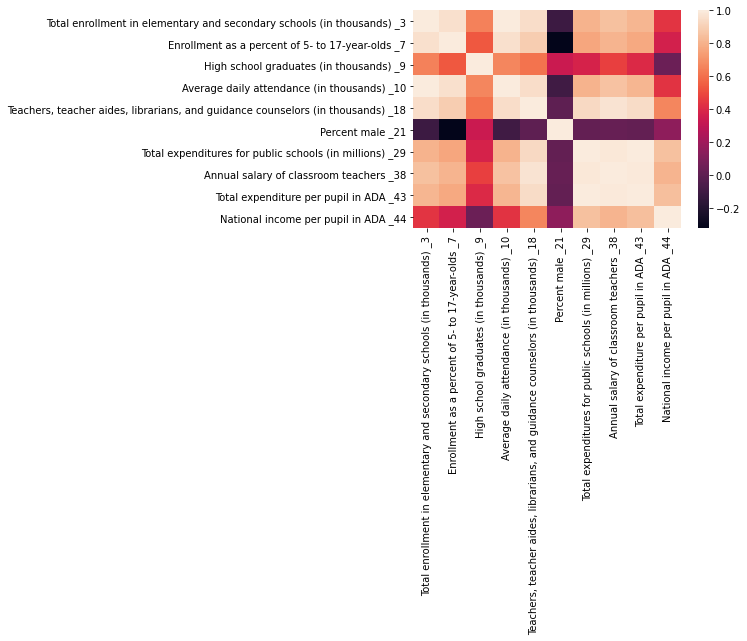

In [ ]:
sn.heatmap(corrMat, annot=False)
plt.show()

In [ ]:
dft_c.set_index(dft_c.index.map(lambda x:int(x[:4])), inplace=True)
dft_na.set_index(dft_na.index.map(lambda x:int(x[:4])), inplace=True)

In [ ]:
dft_nas = dft_na.isna()

In [ ]:
def plotCols(plotted_cols, year_start=1869, year_end=2016):
    year_start = max(1869, year_start)
    year_end = min(2016, year_end)
    data = dft_c[plotted_cols]
    idxs = 1
    idxe = len(data.index)-1
    for i in range(1, len(data.index)):
        if(data.index[i] >= year_start and data.index[i-1] < year_start):
            idxs = i
        if(data.index[i] > year_end and data.index[i-1] <= year_end):
            idxe = i
    data = (data.diff() / data * 100).iloc[idxs:idxe]
    
    fig, ax = plt.subplots()
    ax.plot(data)
    ax.set_title('Year over Year Percent Change')
    legend_labels = [re.sub('_[0-9]+', '', x) for x in plotted_cols]
    ax.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
    
    nas = {}
    for col_name in plotted_cols:
        col = dft_nas[col_name]
        col_na = []
        for i in range(idxs, idxe+1):
            if(idxs!=0 and idxe < len(col.index) and col.iloc[i-1]):
                col_na.append(col.index[i])
        if(len(col_na) > 0):
            nas[col_name] = col_na     
    if(len(nas) > 0):
        print("NA Values:")
        for key in nas.keys():
            print(str(key) + ": ")
            for val in nas[key]:
                print(val, end = ' ')
            print('')

    
def plotInds(plotted_indices, year_start=1869, year_end=2016):
    plotted_cols = [dft_c.columns[x] for x in plotted_indices]
    plotCols(plotted_cols, year_start, year_end)

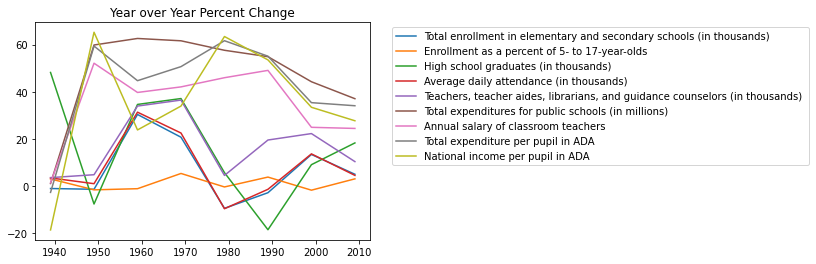

In [ ]:
plotted_indices = [0, 1, 2]
# plotInds(plotted_indices)

plotted_cols = [
    'Total enrollment in elementary and secondary schools (in thousands) _3',
    'Enrollment as a percent of 5- to 17-year-olds _7',
    'High school graduates (in thousands) _9',
    'Average daily attendance (in thousands) _10',
    'Teachers, teacher aides, librarians, and guidance counselors (in thousands) _18',
    'Total expenditures for public schools (in millions) _29',
    'Annual salary of classroom teachers _38',
    'Total expenditure per pupil in ADA _43',
    'National income per pupil in ADA _44'
]
plotCols(plotted_cols, year_start=1930, year_end=2012)